Text(0.5, 0.98, 'Original & RGB image channels')

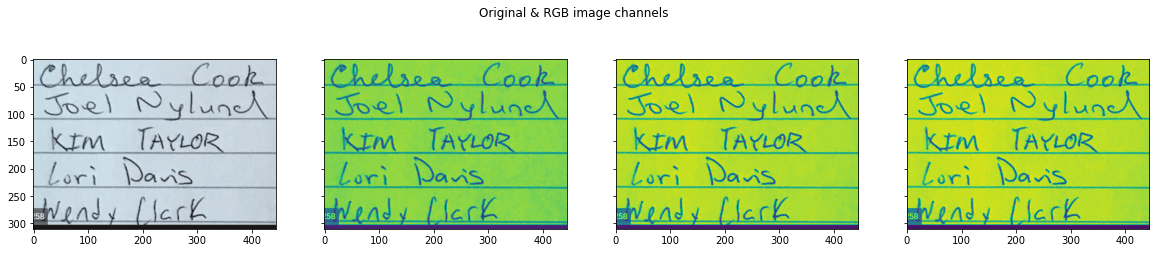

In [19]:

import cv2
import pytesseract
import tensorflow 
import keras  
import os
import glob 
from skimage import color
import random 
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread(r'handwritten.png')
i, (im1, im2, im3, im4) = plt.subplots(1, 4, sharey=True)
i.set_figwidth(20) 

im1.imshow(img)  #Original image
im2.imshow(img[:, : , 0]) #Red
im3.imshow(img[:, : , 1]) #Green
im4.imshow(img[:, : , 2]) #Blue
i.suptitle('Original & RGB image channels')
#plt.show()



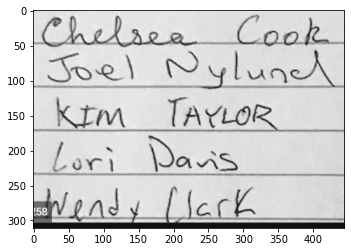

In [20]:
gray_image = color.rgb2gray(img)
plt.imshow(gray_image, cmap = 'gray')
plt.show()


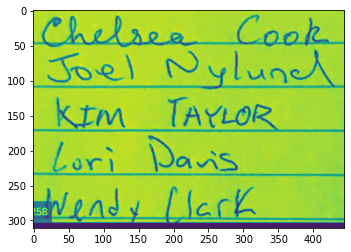

In [21]:
norm_image = (gray_image - np.min(gray_image)) / (np.max(gray_image) - np.min(gray_image))
plt.imshow(norm_image)

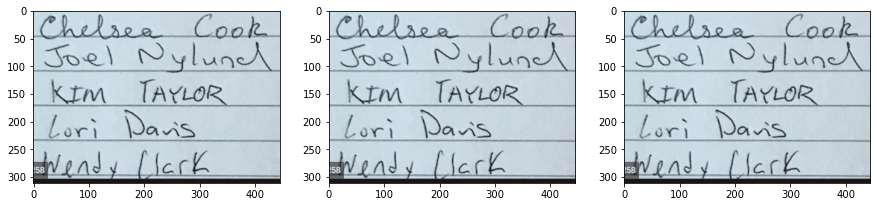

In [22]:
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator

# convert to numpy array
data = img_to_array(img)

# expand dimension to one sample
samples = expand_dims(img, 0)

# create image data augmentation generator
datagen = ImageDataGenerator(featurewise_center =True,
      featurewise_std_normalization = True)
# create an iterator
it = datagen.flow(samples, batch_size=1)
fig, im = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

# generate batch of images
for i in range(3):

    # convert to unsigned integers
    img = next(it)[0].astype('uint8')
 
    # plot image
    im[i].imshow(img) 

TypeError: Can't convert object of type 'numpy.ndarray' to 'str' for 'filename'

In [23]:
# ImageDataGenerator for flipping
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)


In [24]:
datagen = ImageDataGenerator(rotation_range=20, fill_mode='nearest')